In [2]:

##write the code of the simulation of R^2 distribution (the same that we have written in R and Julia) in Python.
##Measure the performance of this solution.

In [18]:
import numpy as np
sizes = np.arange(10, 200, 10)
reps = 10000


In [19]:
import statsmodels.api as sm
def sim_r_squared(n):
    x = np.random.normal(size=n)
    y = 1 + x + np.random.normal(size=n)
    model = sm.OLS(y, sm.add_constant(x)).fit()
    return model.rsquared


In [20]:
r_squared_q95 = np.empty(len(sizes))
r_squared_q5 = np.empty(len(sizes))
r_squared_mean = np.empty(len(sizes))

In [21]:
for i, n in enumerate(sizes):
    print(n)
    result = np.array([sim_r_squared(n) for _ in range(reps)])
    r_squared_mean[i] = result.mean()
    r_squared_q5[i] = np.percentile(result, 5)
    r_squared_q95[i] = np.percentile(result, 95)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


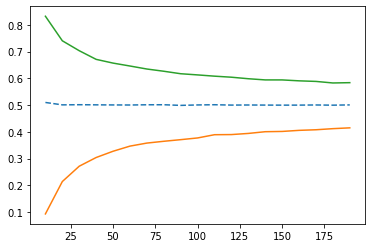

In [22]:
import matplotlib.pyplot as plt
plt.plot(sizes, r_squared_mean, linestyle="--")
plt.ylim=(min(r_squared_q5), max(r_squared_q95))
plt.xlabel="sample size"
plt.ylabel=r"$R^2$"
plt.plot(sizes, r_squared_q5, linestyle="-")
plt.plot(sizes, r_squared_q95, linestyle="-")
plt.show()